Practica de laboratorio.
1.- Con las imágenes contenidas en la carpeta procésalas de manera que obtengan el 
siguiente resultado

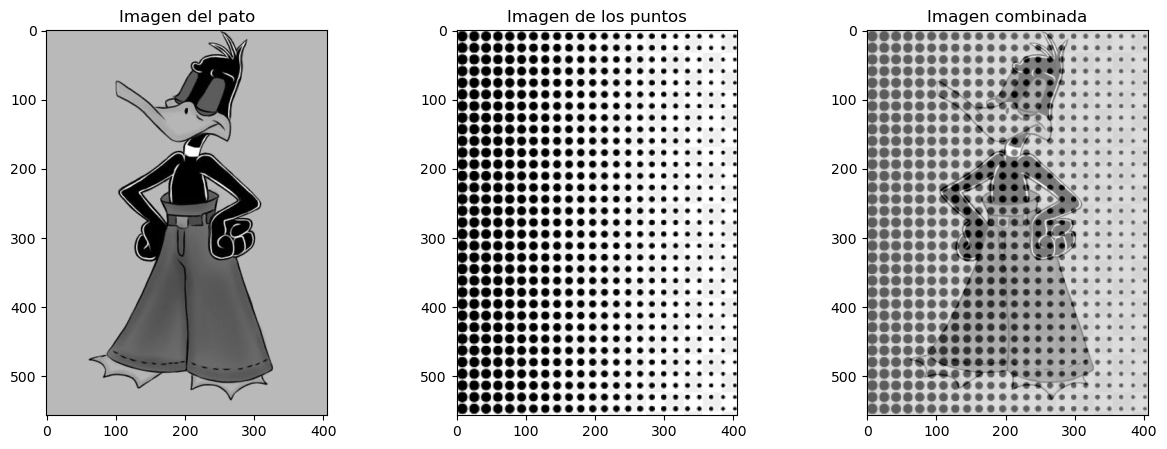

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread('pato.jpg',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('puntos.png',cv2.IMREAD_GRAYSCALE)

img = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

alpha = 0.5 
beta = 1 - alpha
img_combinada = cv2.addWeighted(image1, alpha, img, beta, 0)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Imagen del pato')
plt.imshow(image1, cmap='gray')
#plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Imagen de los puntos')
plt.imshow(image2, cmap='gray')
#plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Imagen combinada')
plt.imshow(img_combinada, cmap='gray')
#plt.axis('off')

plt.show()


2.- Cuenta cuantos objetos de cada color se encuentran en la imagen 

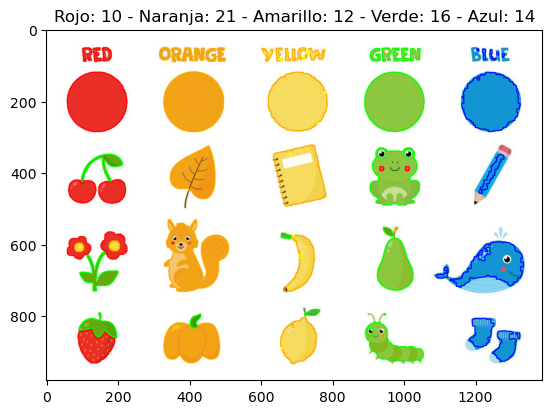

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contar(img, lower_bound, upper_bound):
    mask = cv2.inRange(img, lower_bound, upper_bound)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    bordes, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cont = len(bordes)
    return bordes, cont

image = cv2.imread('colores.jpg')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

rangos_colores = {
    'Rojo': ([0, 100, 100], [10, 255, 255]),
    'Naranja': ([11, 100, 100], [25, 255, 255]),
    'Amarillo': ([26, 100, 100], [35, 255, 255]),
    'Verde': ([36, 100, 100], [70, 255, 255]),
    'Azul': ([100, 100, 100], [130, 255, 255])
}

resultados = []

for color, (lower, upper) in rangos_colores.items():
    lower_bound = np.array(lower, dtype=np.uint8)
    upper_bound = np.array(upper, dtype=np.uint8)
    bordes, count = contar(image_hsv, lower_bound, upper_bound)
    resultados.append((color, count, bordes))

image_contours = image.copy()

for color, count, bordes in resultados:
    color_bgr = (0, 0, 0)
    if color == 'Rojo':
        color_bgr = (0, 0, 255)
    elif color == 'Naranja':
        color_bgr = (0, 165, 255)
    elif color == 'Amarillo':
        color_bgr = (0, 255, 255)
    elif color == 'Verde':
        color_bgr = (0, 255, 0)
    elif color == 'Azul':
        color_bgr = (255, 0, 0)
    
    image_contours = cv2.drawContours(image_contours, bordes, -1, color_bgr, 2)

plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
titulos = [f'{color}: {count}' for color, count, _ in resultados]
plt.title(' - '.join(titulos))
plt.show()


3.- Estás trabajando en un proyecto de reconocimiento de rostros y necesitas detectar los 
bordes de las caras en las imágenes. Explique cómo aplicaría el operador de detección de 
bordes de Canny y aplícalo con un código en Python en jupyter

R.- La detección de bordes de Canny es una técnica ampliamente utilizada en visión por computadora para encontrar los bordes en una imagen. Funciona aplicando una serie de pasos, que incluyen suavizado de la imagen, detección de gradientes y supresión de no máximos, y finalmente, la aplicación de un umbral para identificar los bordes finales.

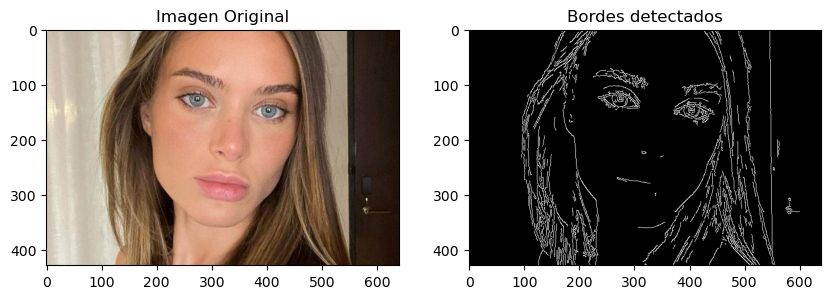

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('img.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray_image, 100, 200)  

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
plt.title('Imagen Original')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Bordes detectados')
plt.show()
